<a href="https://colab.research.google.com/github/decastrosantos/Breast-Cancer-Analysis-EDA-/blob/main/Breast_Cancer_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Dataset

Task Summary: Breast Cancer Analysis with Python
As a Data Analyst in this task I will work with the Breast Cancer Wisconsin dataset to perform exploratory data analysis (EDA) using Pandas, NumPy, and Matplotlib. The key tasks include:

- Data Loading & Exploration: Load the dataset, inspect its structure, check for missing values, and verify data types.
- Dataset Overview: Display sample rows, check dataset dimensions, and store column names for reference.
- Data Analysis: Count and visualize the distribution of benign vs. malignant tumors using bar charts.
- Data Segmentation: Separate benign and malignant cases into different datasets for deeper analysis.
- Statistical Insights: Compute key statistics (max, min, mean, median, standard deviation) for tumor radius.
- Data Visualization:
  - Scatter plot of radius vs. perimeter.
  - Scatter plot of radius vs. perimeter, highlighting malignant tumors in red and benign tumors in blue.
  - Scatter plot of concave points vs. smoothness.
  - Scatter plot of concave points vs. smoothness, using the same color coding as above.

This analysis aims to uncover patterns in tumor characteristics and help in understanding key relationships between variables.


"Breast Cancer Wisconsin" **Dataset**: (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).


1. Load the data from the CSV file

In [ ]:
#Let's define the essential libraries required.
import numpy as np                                   #for array
import pandas as pd                                  #for dataframe
import matplotlib.pyplot as plt                      #for visualization
%matplotlib inline
import seaborn as sns                                #for visualization
import warnings ; warnings.filterwarnings('ignore')  #for warnings->codes run smoother

2. Take a first look at the first 13 rows of the dataset and the last 6 rows

In [ ]:
#we read the data and save it as a dataframe
cancer_data_df = pd.read_csv('data.csv')

cancer_data_df.head(13)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [ ]:
cancer_data_df.tail(6)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873,NaN
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


3. Check the size of the dataset



In [ ]:
cancer_data_df.shape

(569, 33)

4. Store the column names in a list

In [ ]:
lista = cancer_data_df.columns.to_list()

In [ ]:
lista

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

5. Check the data types of each variable

In [ ]:
cancer_data_df.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [ ]:
cancer_data_df.fractal_dimension_se.astype("int")

,fractal_dimension_se
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


6. Are there any null values in our dataset? How many?

In [ ]:
cancer_data_df.isna()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
np.sum(cancer_data_df.isna())

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


7. How many tumors are benign (Diagnosis = B) and how many are malignant (Diagnosis = M)?

In [ ]:
diagnosis = cancer_data_df["diagnosis"].unique().tolist()

In [ ]:
cancer_data_df["diagnosis"].value_counts()

,count
diagnosis,
B,357
M,212


In [ ]:
counts = cancer_data_df["diagnosis"].value_counts().tolist()

In [ ]:
counts = counts[::-1]

In [ ]:
counts

[212, 357]

8. Represent the above in a bar chart

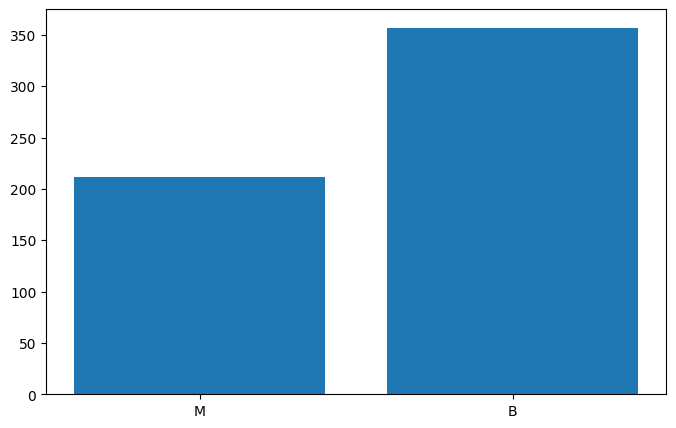

In [ ]:
plt.figure(figsize=(8,5), dpi=100)

plt.bar(diagnosis,counts)


plt.show()

9. Save the benign tumor data in one dataset and the malignant tumor data in another

In [ ]:
benignos_df = cancer_data_df[(cancer_data_df.diagnosis == "B")]

In [ ]:
malignos_df = cancer_data_df[(cancer_data_df.diagnosis == "M")]

In [ ]:
malignos_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


10. Calculate the maximum, minimum, mean, median, and standard deviation of the radius

In [ ]:
np.max(cancer_data_df["radius_mean"])

28.11

In [ ]:
np.min(cancer_data_df["radius_mean"])

6.981

In [ ]:
np.mean(cancer_data_df["radius_mean"])

14.127291739894552

In [ ]:
np.median(cancer_data_df["radius_mean"])

13.37

In [ ]:
np.std(cancer_data_df["radius_mean"])

3.5209507607110626

In [ ]:
cancer_data_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


11. Represent the relationship between (radius) and (perimeter) in a scatter plot

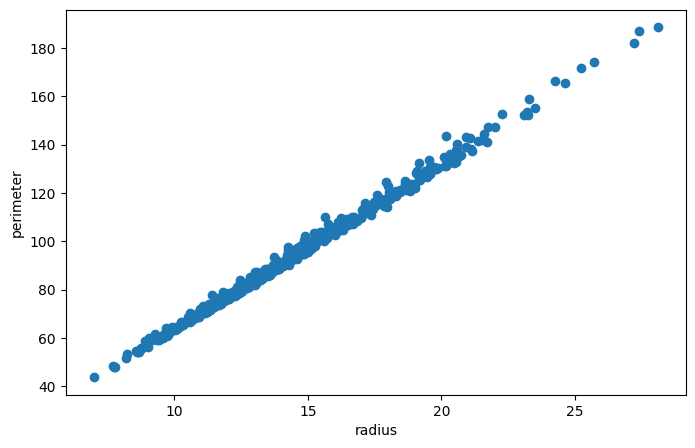

In [ ]:
plt.figure(figsize=(8,5), dpi=100)

plt.scatter(cancer_data_df.radius_mean,cancer_data_df.perimeter_mean)

plt.xlabel("radius")
plt.ylabel("perimeter")


plt.show()

12. Represent the relationship between (radius) and (perimeter) in a scatter plot, coloring malignant tumors in red and benign ones in blue

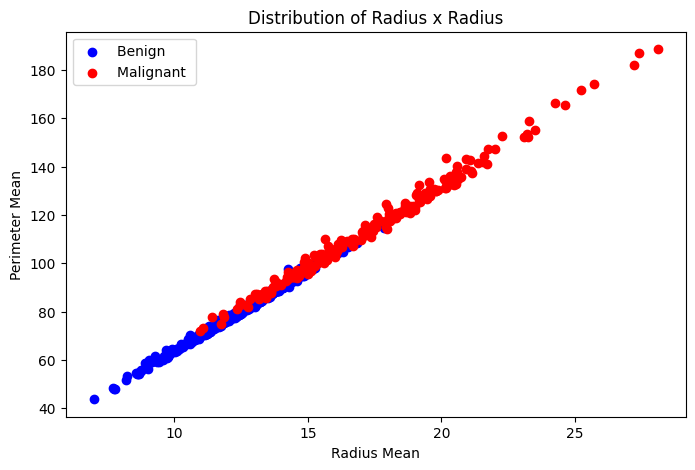

In [ ]:
plt.figure(figsize=(8,5), dpi=100)

# Benign points in blue
plt.scatter(cancer_data_df[cancer_data_df.diagnosis == "B"].radius_mean,
            cancer_data_df[cancer_data_df.diagnosis == "B"].perimeter_mean,
            color="blue", label="Benign ")

# Malignant points in red
plt.scatter(cancer_data_df[cancer_data_df.diagnosis == "M"].radius_mean,
            cancer_data_df[cancer_data_df.diagnosis == "M"].perimeter_mean,
            color="red", label="Malignant ")

# Adding labels
plt.xlabel("Radius Mean")
plt.ylabel("Perimeter Mean")
plt.title("Distribution of Radius x Radius")
plt.legend()
plt.show()

13. Represent the relationship between the number of (concave points) and (smoothness ) in a scatter plot

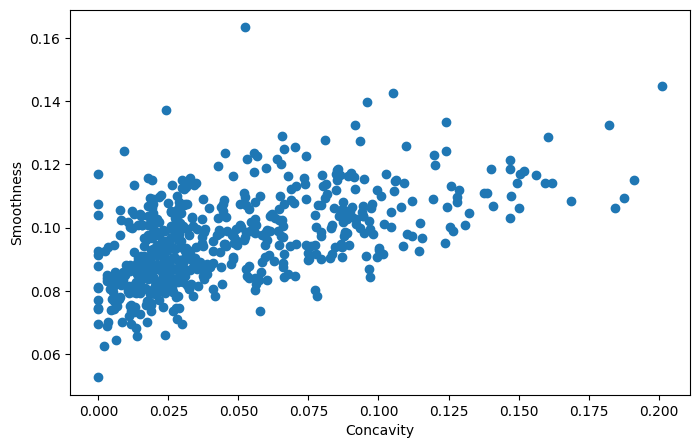

In [ ]:
plt.figure(figsize=(8,5), dpi=100)

plt.scatter(cancer_data_df['concave points_mean'],cancer_data_df.smoothness_mean)

plt.xlabel("Concavity")
plt.ylabel("Smoothness")


plt.show()

14. Represent the relationship between the number of (concave points) and (smoothness) in a scatter plot, coloring malignant tumors in red and benign ones in blue

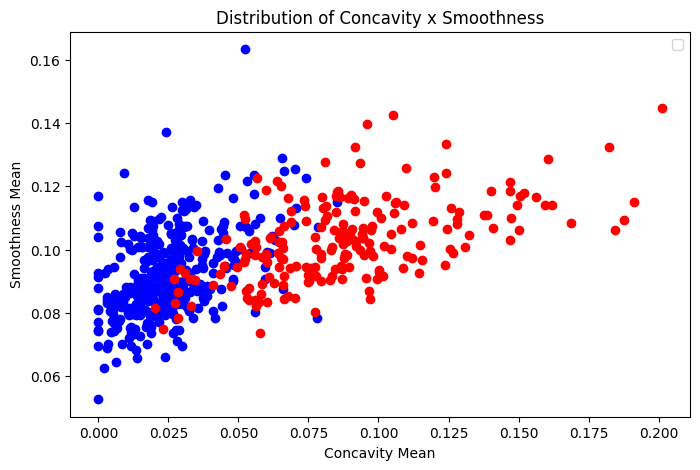

In [ ]:
plt.figure(figsize=(8,5), dpi=100)

# Benign points in blue
plt.scatter(benignos_df['concave points_mean'],benignos_df.smoothness_mean, color="blue")

# Malignant points in red
plt.scatter(malignos_df['concave points_mean'],malignos_df.smoothness_mean, color="red")

# Adding labels
plt.xlabel("Concavity Mean")
plt.ylabel("Smoothness Mean")
plt.title("Distribution of Concavity x Smoothness")
plt.legend()
plt.show()